__<h1 style="text-align: center;font-size: 3rem">Basic Exploratory Data Analysis</h1><h2 style="text-align: center;font-size: 1.3rem">(Notebook I)</h2>__

## Imports

Using Pandas and NumPy for numerical computation and exploration while using Seaborn and MatPlotLib to visualize data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import itertools
import os


## Setup
Loading the random state to seed into analysis for replicable results. The random state is obtained from the `.env` file from the variable named _'RANDOM_STATE'_.

In [2]:
load_dotenv()
RANDOM_STATE = int(os.getenv("RANDOM_STATE", 0))

print(f"{RANDOM_STATE=}")

RANDOM_STATE=39103


Setting the background on graphs to be darker for preference.

In [3]:
plt.style.use("dark_background")

## Reading CSV into a DataFrame

As completed in the `01_data_ingestion.ipynb` notebook, the data is stored as a Parquet file, requiring the `read_parquet` method to read the data into a DataFrame object.

In [4]:
transactions: pd.DataFrame = pd.read_parquet(r"../data/processed/creditcard.parquet")

## Characteristics of the Data

Observing the first and last 10 entries, observing the data's first-glance characteristics.

In [5]:
transactions.head(10)

time        v1        v2        v3        v4        v5        v6        v7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8     7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9     9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        v26       v27       v28  amount  is_fraud  
0 -0.189115  0.133558 -0.021053  149.62     False  
1  0.125895 -0.008983  0.014724    2.69     False  
2 -0.139097 -0.055353 -0.059752  378.66     False  
3 -0.221929  0.062723  0.061458  123.50     False  
4  0.502292  0.219422  0.215153   69.99     False  
5  0.105915  0.253844  0.081080    3.67     False  
6 -0.257237  0.034507  0.005168    4.99     False  
7 -0.051634 -1.206921 -1.085339   40.80     False  
8 -0.384157  0.011747  0.142404   93.20     False  
9  0.094199  0.246219  0.083076    3.68     False  

[10 rows x 31 columns]

In [6]:
transactions.tail(10)

time         v1         v2        v3        v4        v5        v6  \
284797  172782  -0.241923   0.712247  0.399806 -0.463406  0.244531 -1.343668   
284798  172782   0.219529   0.881246 -0.635891  0.960928 -0.152971 -1.014307   
284799  172783  -1.775135  -0.004235  1.189786  0.331096  1.196063  5.519980   
284800  172784   2.039560  -0.175233 -1.196825  0.234580 -0.008713 -0.726571   
284801  172785   0.120316   0.931005 -0.546012 -0.745097  1.130314 -0.235973   
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              v7        v8        v9  ...       v21       v22       v23  \
284797  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376  0.279598   
284798  0.427126  0.121340 -0.285670  ...  0.099936  0.337120  0.251791   
284799 -1.518185  2.080825  1.159498  ...  0.103302  0.654850 -0.348929   
284800  0.017050 -0.118228  0.435402  ... -0.268048 -0.717211  0.297930   
284801  0.812722  0.115093 -0.204064  ... -0.314205 -0.808520  0.050343   
284802 -4.918215  7.305334  1.914428  ...  0.213454  0.111864  1.014480   
284803  0.024330  0.294869  0.584800  ...  0.214205  0.924384  0.012463   
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180  ...  0.261057  0.643078  0.376777   

             v24       v25       v26       v27       v28  amount  is_fraud  
284797  0.371441 -0.559238  0.113144  0.131507  0.081265    5.49     False  
284798  0.057688 -1.508368  0.144023  0.181205  0.215243   24.05     False  
284799  0.745323  0.704545 -0.127579  0.454379  0.130308   79.99     False  
284800 -0.359769 -0.315610  0.201114 -0.080826 -0.075071    2.68     False  
284801  0.102800 -0.435870  0.124079  0.217940  0.068803    2.69     False  
284802 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77     False  
284803 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79     False  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88     False  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00     False  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00     False  

[10 rows x 31 columns]

As mentioned per the Content section of the data's [_Kaggle_ page](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), the time appears to represent the number of seconds a transaction occured after the first record transaction and 28 of the variables are abstracted including their original name and nature.

Due to PCA transformation and other privacy policies, the original names and natures of these variables are unknown. These still describe the transaction's characteristics and can still be potentially explored and implemented into future models.

The currency amount is measured is not clearly stated or evident in the Kaggle page or the data, however, due to the data being sourced in Europe it's possible it is measured in Euros. This is not hugely relevant to the analysis however as the scale in difference between amounts is what matters.

The class is either _0_ for a genuine transaction or _1_ for a fraudulent transaction.

## More Insight

Using the DataFrame's `describe()` and `info()` methods, deeper characteristics of the columns begin to show.

In [7]:
transactions.describe()

time            v1            v2            v3            v4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 v5            v6            v7            v8            v9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           v20           v21           v22           v23  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  6.418678e-16  1.628620e-16 -3.576577e-16  2.618565e-16   
std    ...  7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01   
min    ... -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01   
25%    ... -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01   
50%    ... -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02   
75%    ...  1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01   
max    ...  3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01   

                v24           v25           v26           v27           v28  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.473914e-15  5.109395e-16  1.686100e-15 -3.661401e-16 -1.227452e-16   
std    6.056471e-01  5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01   
min   -2.836627e+00 -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01   
25%   -3.545861e-01 -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02   
50%    4.097606e-02  1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02   
75%    4.395266e-01  3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02   
max    4.584549e+00  7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   

              amount  
count  284807.000000  
mean       88.349619  
std       250.120109  
min         0.000000  
25%         5.600000  
50%        22.000000  
75%        77.165000  
max     25691.160000  

[8 rows x 30 columns]

At a first glance, not much can be interpreted from the described columns. The distributions of the unnamed variables are all very similar as they are centered around a near 0 value. This could hint that the redacted variables were normalized prior to being placed into the dataset, using _'Min-Max Normalization'_ or another type of normalization.

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      284807 non-null  int32  
 1   v1        284807 non-null  float64
 2   v2        284807 non-null  float64
 3   v3        284807 non-null  float64
 4   v4        284807 non-null  float64
 5   v5        284807 non-null  float64
 6   v6        284807 non-null  float64
 7   v7        284807 non-null  float64
 8   v8        284807 non-null  float64
 9   v9        284807 non-null  float64
 10  v10       284807 non-null  float64
 11  v11       284807 non-null  float64
 12  v12       284807 non-null  float64
 13  v13       284807 non-null  float64
 14  v14       284807 non-null  float64
 15  v15       284807 non-null  float64
 16  v16       284807 non-null  float64
 17  v17       284807 non-null  float64
 18  v18       284807 non-null  float64
 19  v19       284807 non-null  float64
 20  v20 

There is no missing data in the non-modified dataset as the Non-Null Counts of each column is equal to the number of rows. Aside from the _'time'_ and _'is_fraud'_ columns which are measured as integers and booleans respectively, all other columns are continuous values stored as floats.

Class Proportions
---
Better understanding the proportion of the classes (genuine or fraudulent).

In [9]:
target_name: str = "is_fraud"
print(transactions[target_name].value_counts())
print(
    transactions[target_name].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")
)

is_fraud
False    284315
True        492
Name: count, dtype: int64
is_fraud
False    99.83%
True      0.17%
Name: proportion, dtype: object


There is severe class imbalance, being that less than 0.17% of transaction in the data are fraudulent. Resampling techniques like SMOTE will likely be utilized and evaluated against other techniques along with training to focus more on making less false-fraudulent labeling.

## Visualizations

The target and features are separated to simplify visualization and to group and plot rows by their class.

In [10]:
target = transactions[target_name]
features = transactions.drop(columns=[target_name])

The values are all standardized to standardize axes.

In [11]:
standardized_features = (features - features.mean()) / features.std()

Storing the number of rows and columns for use in generating visualization.

In [12]:
row_count = transactions.shape[0]
col_count = transactions.shape[1]

As there are too many entries to plot, 40% of the entries are used for visualization, stratified by the target.

In [13]:
grouped_transactions = transactions.groupby(target_name, group_keys=False)
sampled_transactions = grouped_transactions.sample(frac=0.4, random_state=RANDOM_STATE)


A sanity check to make sure the proportion of the sampled fraudulent and genuine transactions still match the entire dataset.

In [14]:
print(
    sampled_transactions[target_name]
    .value_counts(normalize=True)
    .apply(lambda x: f"{x:.2%}")
)

is_fraud
False    99.83%
True      0.17%
Name: proportion, dtype: object


### Correlation Matrices

Getting two DataFrames from the sampled transactions with one being only the fraudulent transactions and the other being only the genuine transaction. Each of the correlations are calculated using the `.corr()` DataFrame method.

In [15]:
is_fraud_mask = transactions[target_name] == 1

class_0_df = transactions[~is_fraud_mask]
class_0_corr = class_0_df.corr()

class_1_df = transactions[is_fraud_mask]
class_1_corr = class_1_df.corr()

Creating a subplot with two axes for plots. A heatmap is placed in each available axis to visualize the correlation matrices. The `diag_mask` indicates to the heatmap to ignore the correlations that form a diagonal of 1.00s (a result of a variable being 100% correlated with itself).

Text(0.5, 0.95, 'Fig 1: Correlation Matrices by Classes')

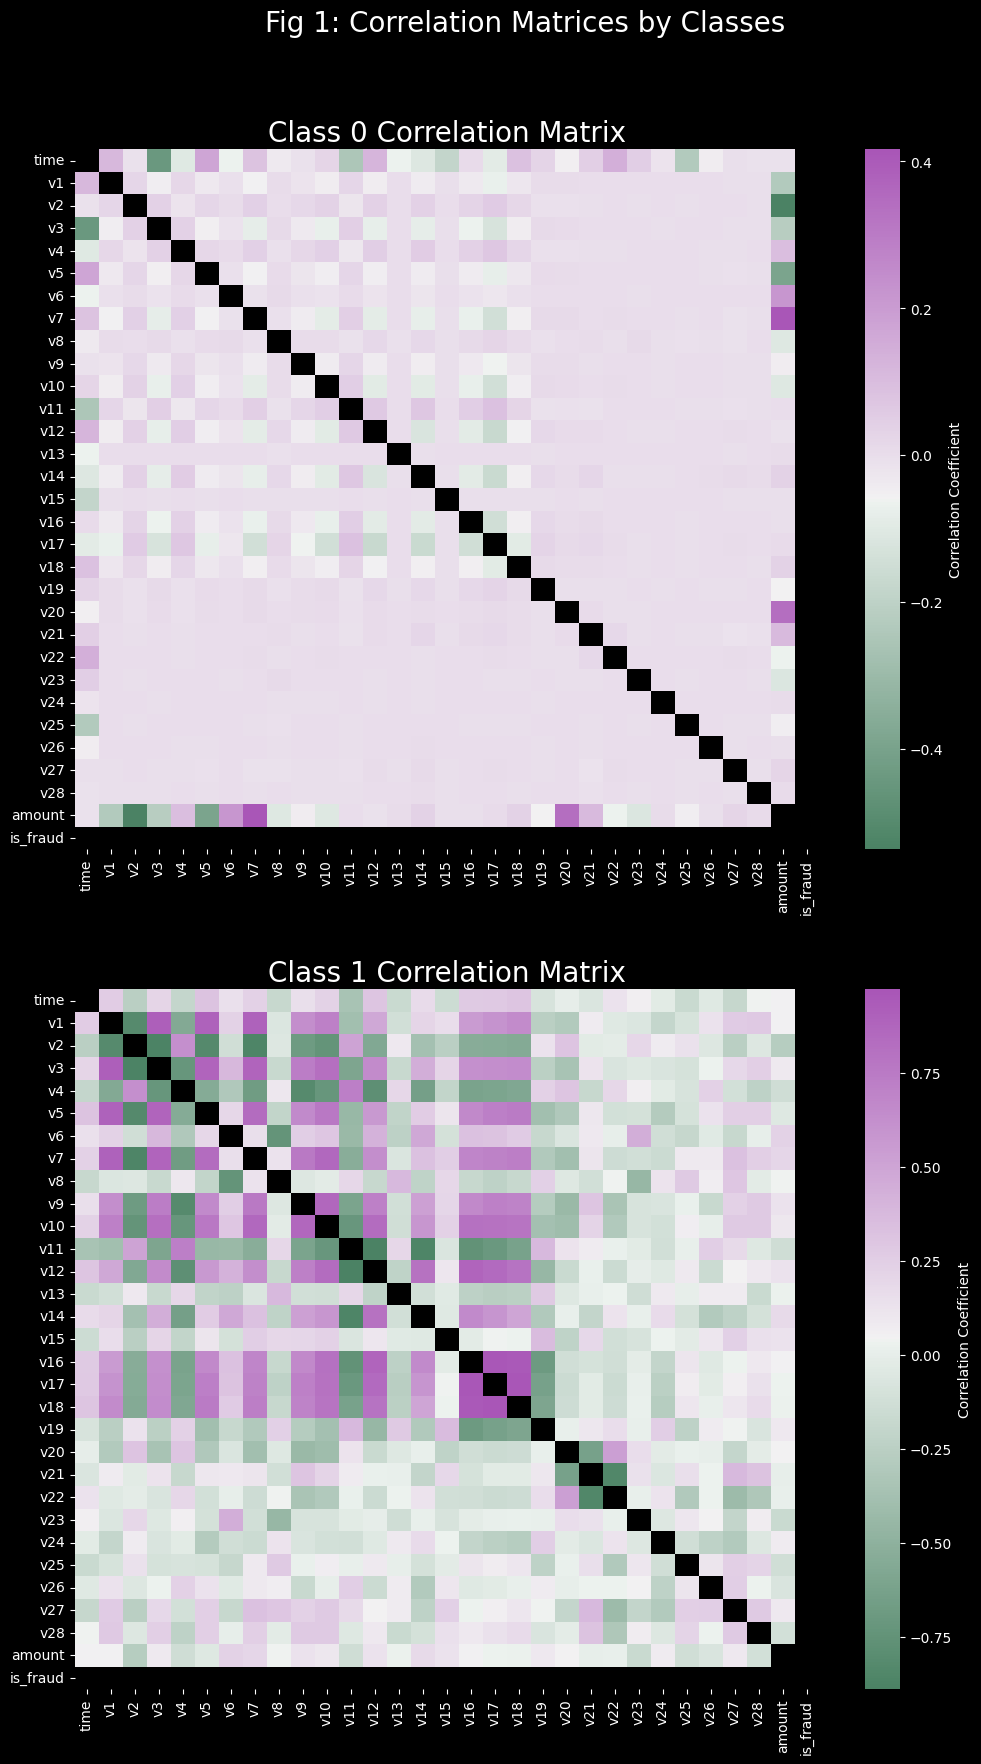

In [16]:
diag_mask = np.eye(col_count, dtype=bool)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

sns.heatmap(
    class_0_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"},
    ax=axes[0],
)
axes[0].set_title("Class 0 Correlation Matrix", fontsize=20)

sns.heatmap(
    class_1_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"},
    ax=axes[1],
)
axes[1].set_title("Class 1 Correlation Matrix", fontsize=20)

fig.suptitle("Fig 1: Correlation Matrices by Classes", fontsize=20, y=0.95)

<Axes: >

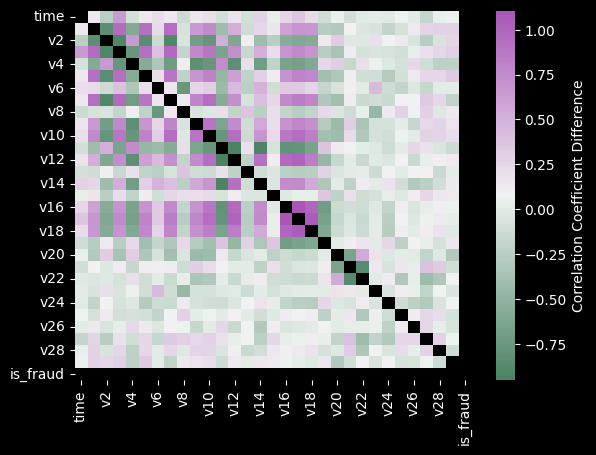

In [17]:
sns.heatmap(
    class_1_corr - class_0_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient Difference"},
)

### Distributions via Box Plots

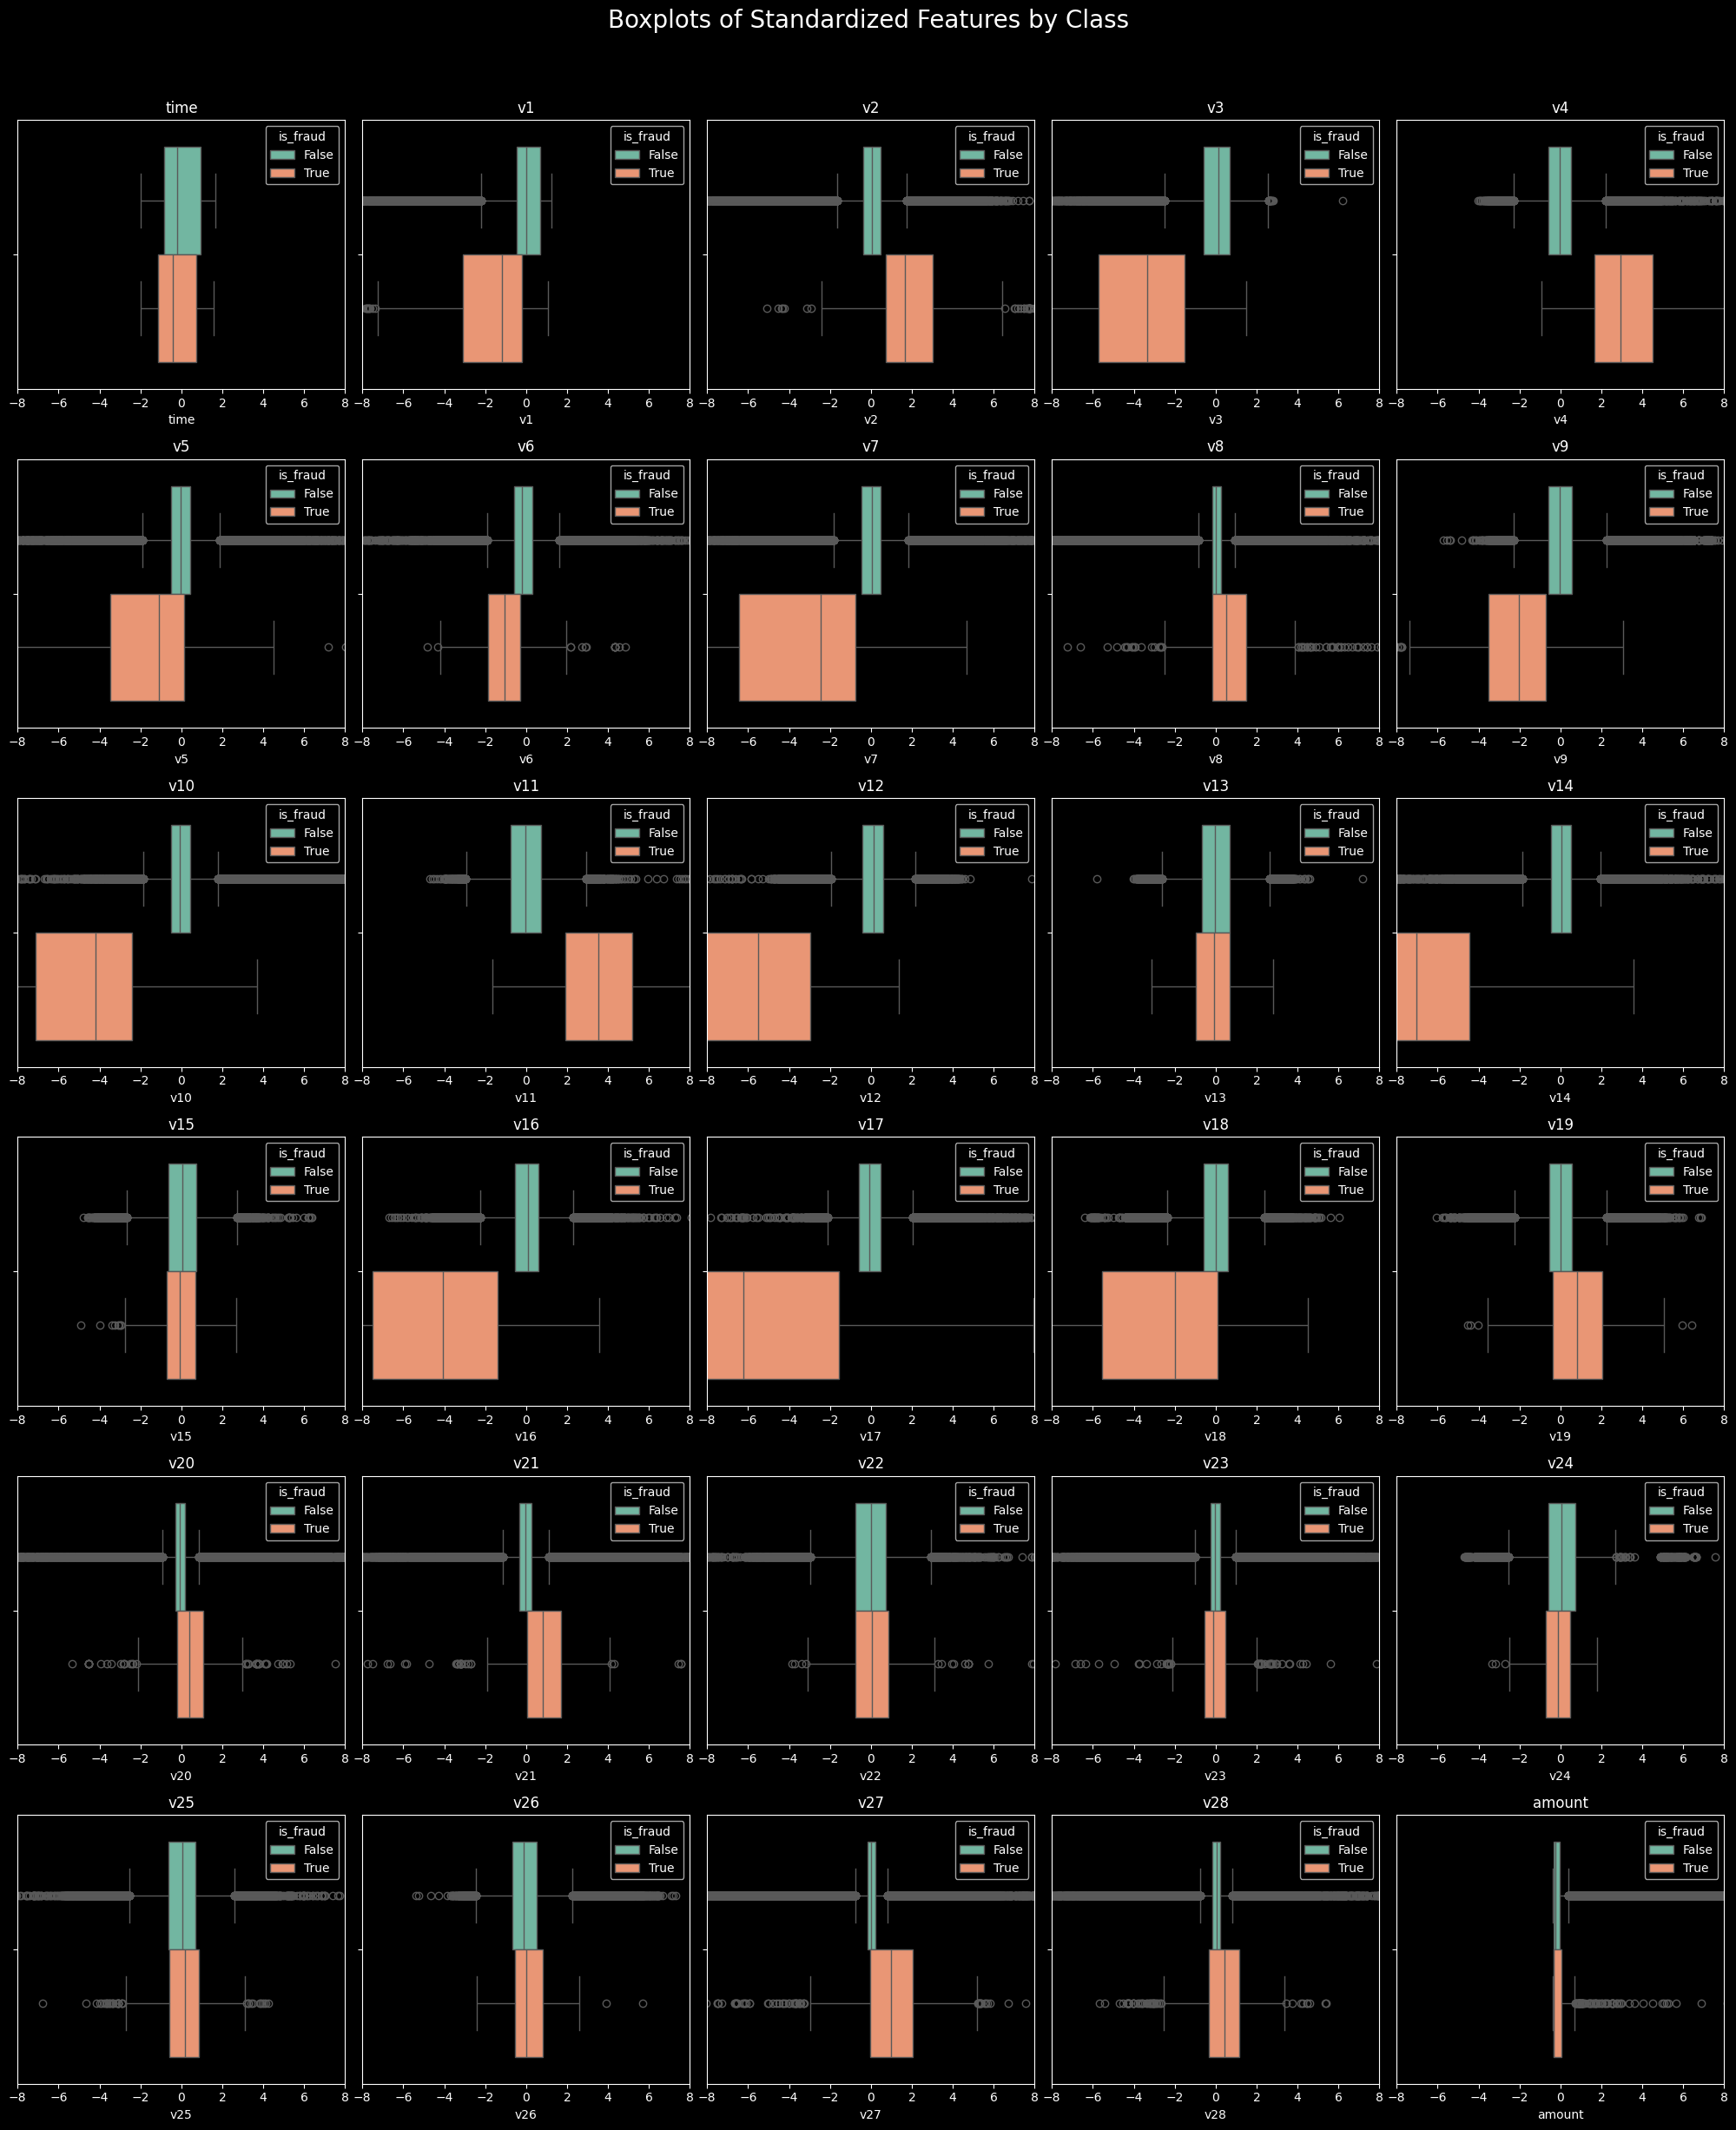

In [18]:
cols = 5
rows = int(np.round(col_count / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 24))

for i, col in enumerate(features.columns):
    ax = axes[i // cols, i % cols]
    sns.boxplot(
        standardized_features,
        x=col,
        palette="Set2",
        hue=transactions[target_name],
        ax=ax,
    )
    ax.set_title(col)
    ax.set_xlim(-8, 8)

fig.suptitle("Boxplots of Standardized Features by Class", fontsize=20, y=1.02)
fig.tight_layout()

### Clusters

In [19]:
grouped_feats = tuple(itertools.batched(features.columns, 6))
grouped_feats

(('time', 'v1', 'v2', 'v3', 'v4', 'v5'),
 ('v6', 'v7', 'v8', 'v9', 'v10', 'v11'),
 ('v12', 'v13', 'v14', 'v15', 'v16', 'v17'),
 ('v18', 'v19', 'v20', 'v21', 'v22', 'v23'),
 ('v24', 'v25', 'v26', 'v27', 'v28', 'amount'))

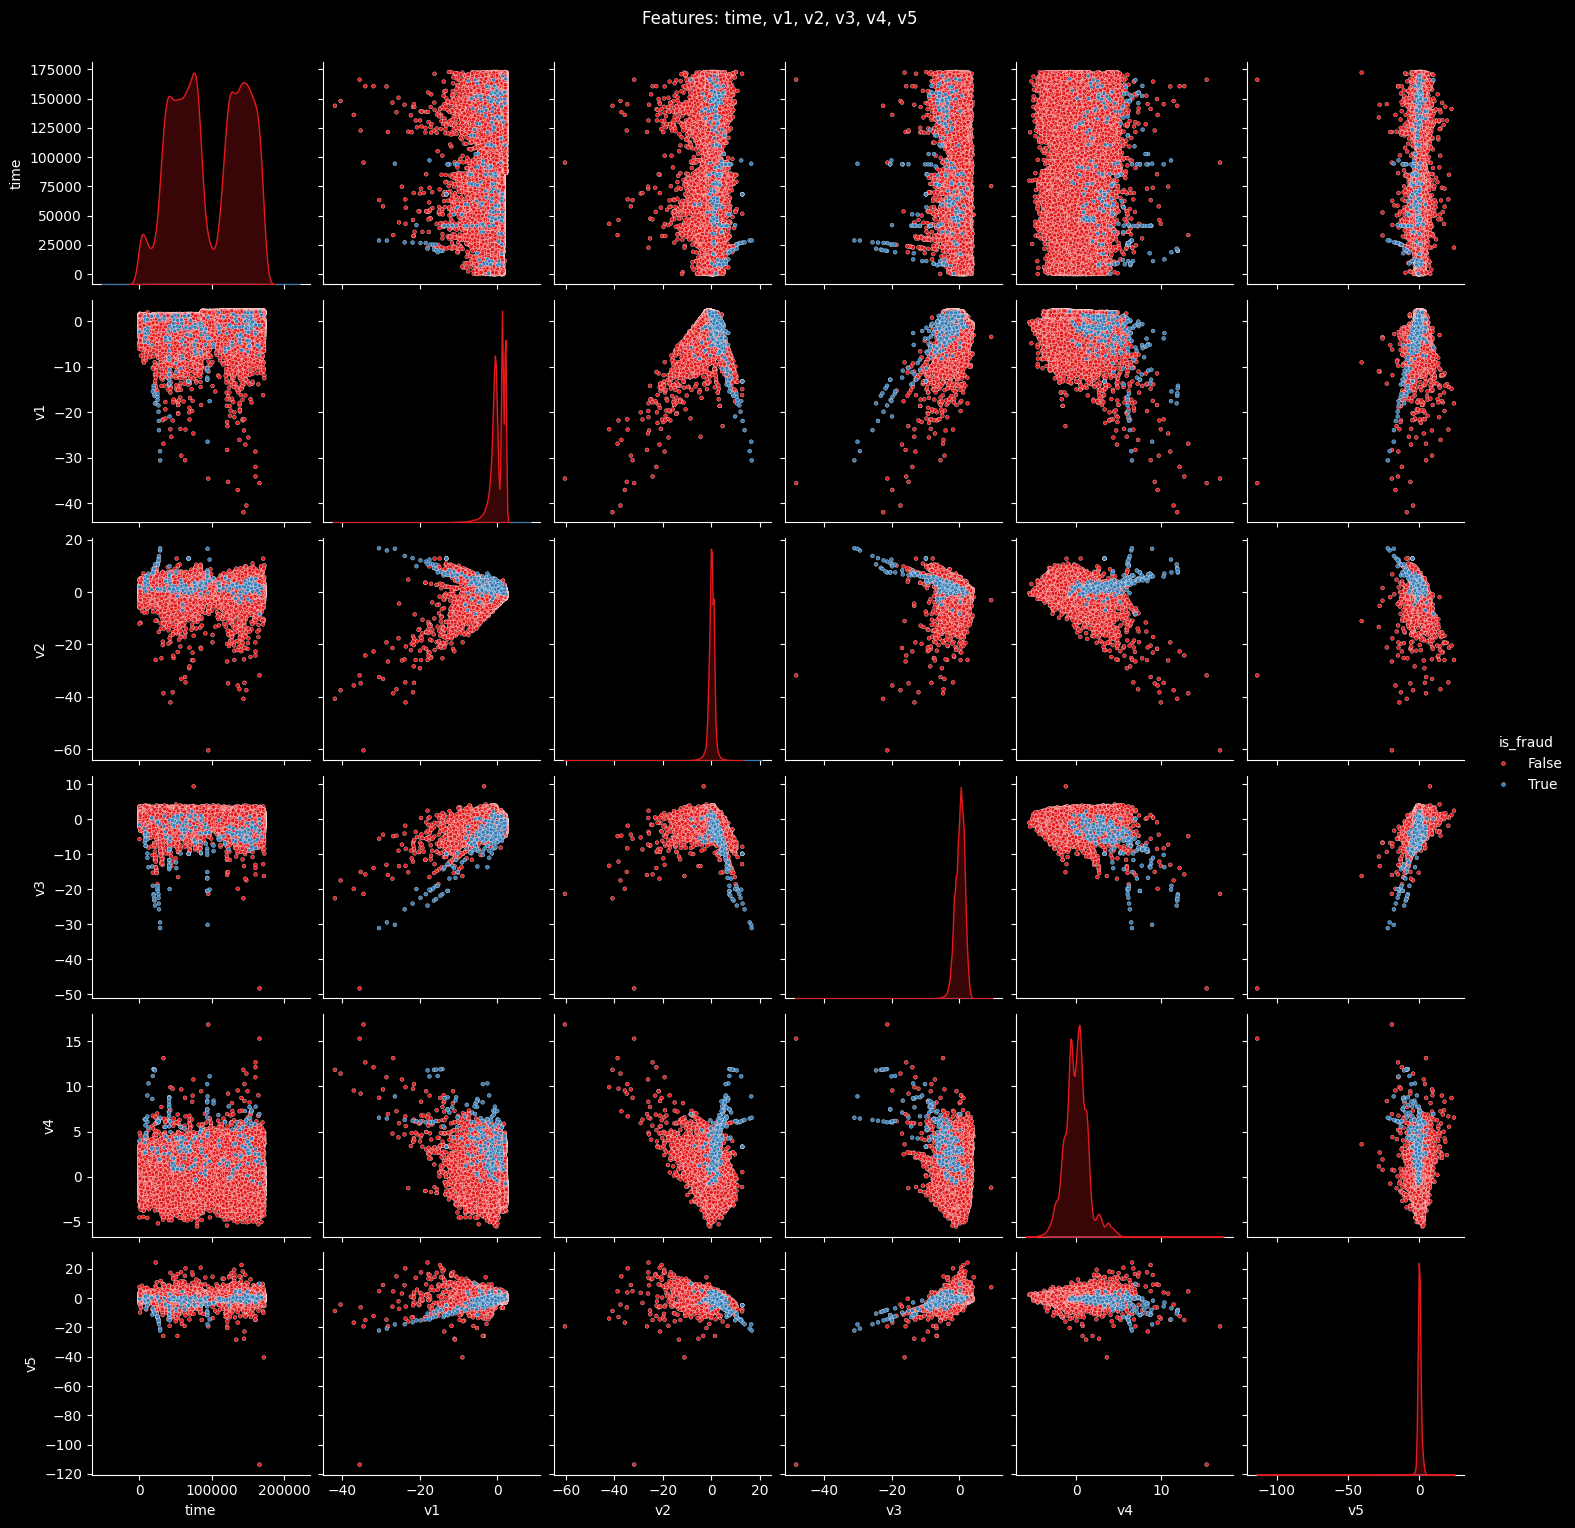

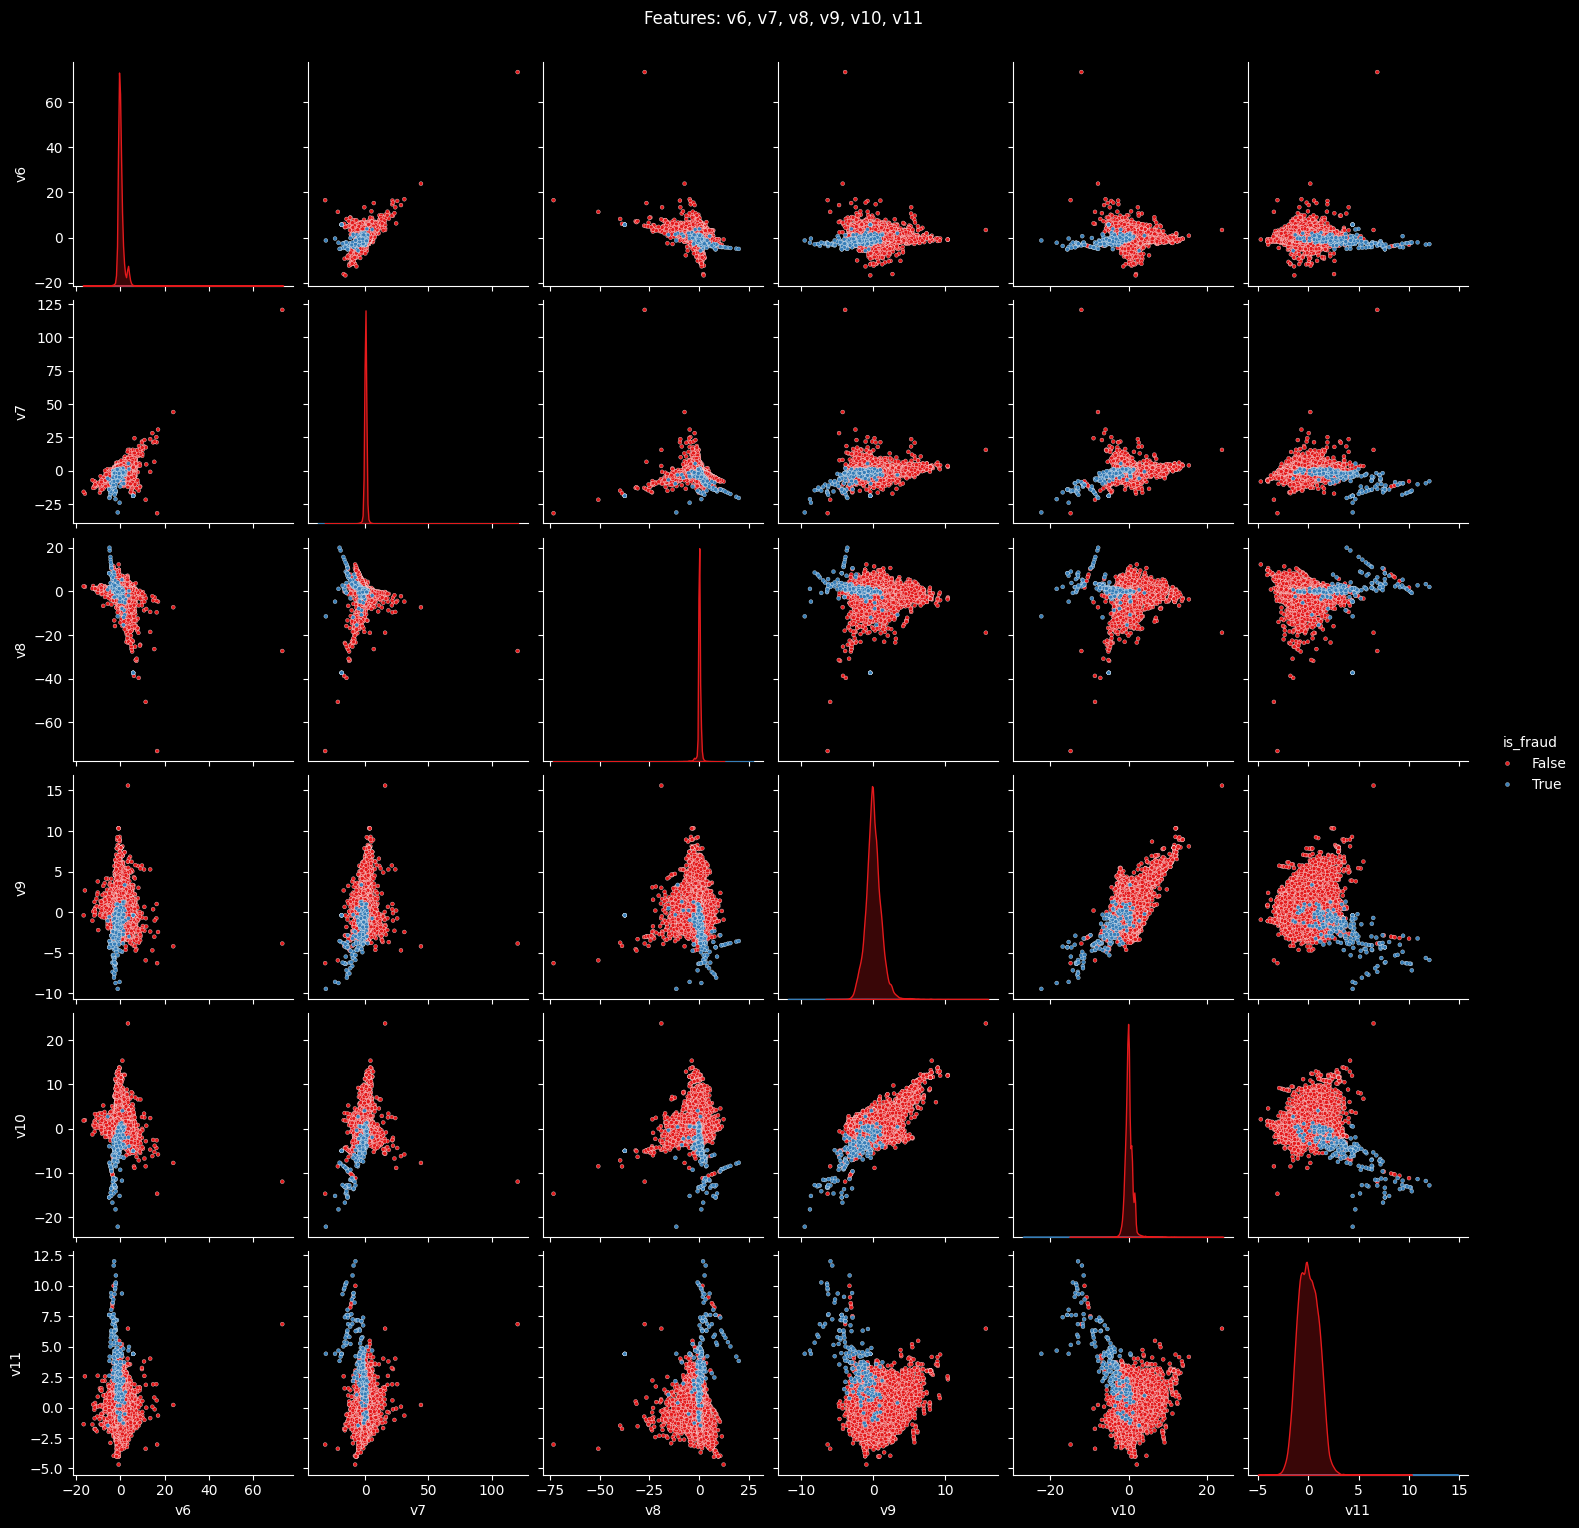

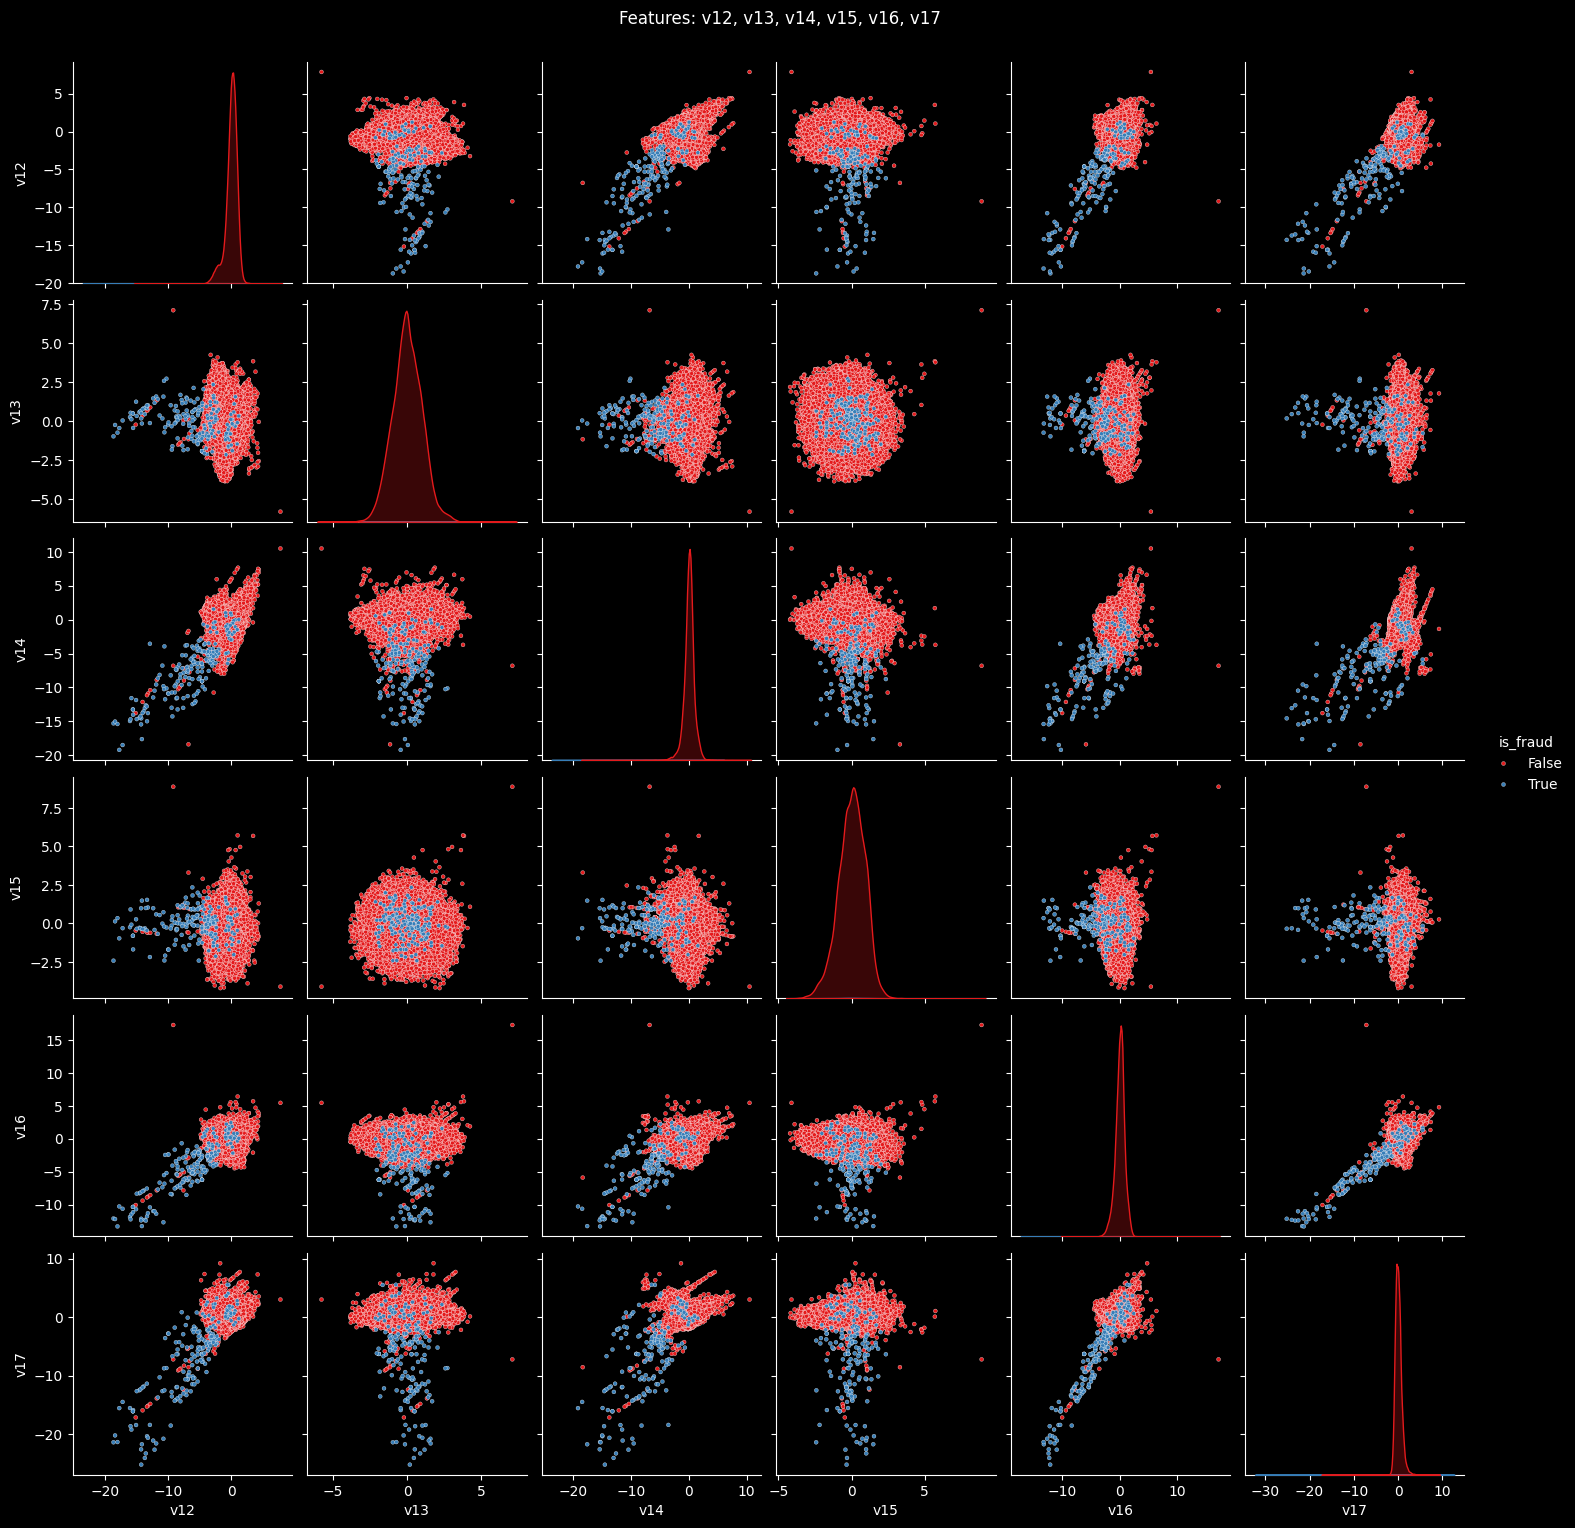

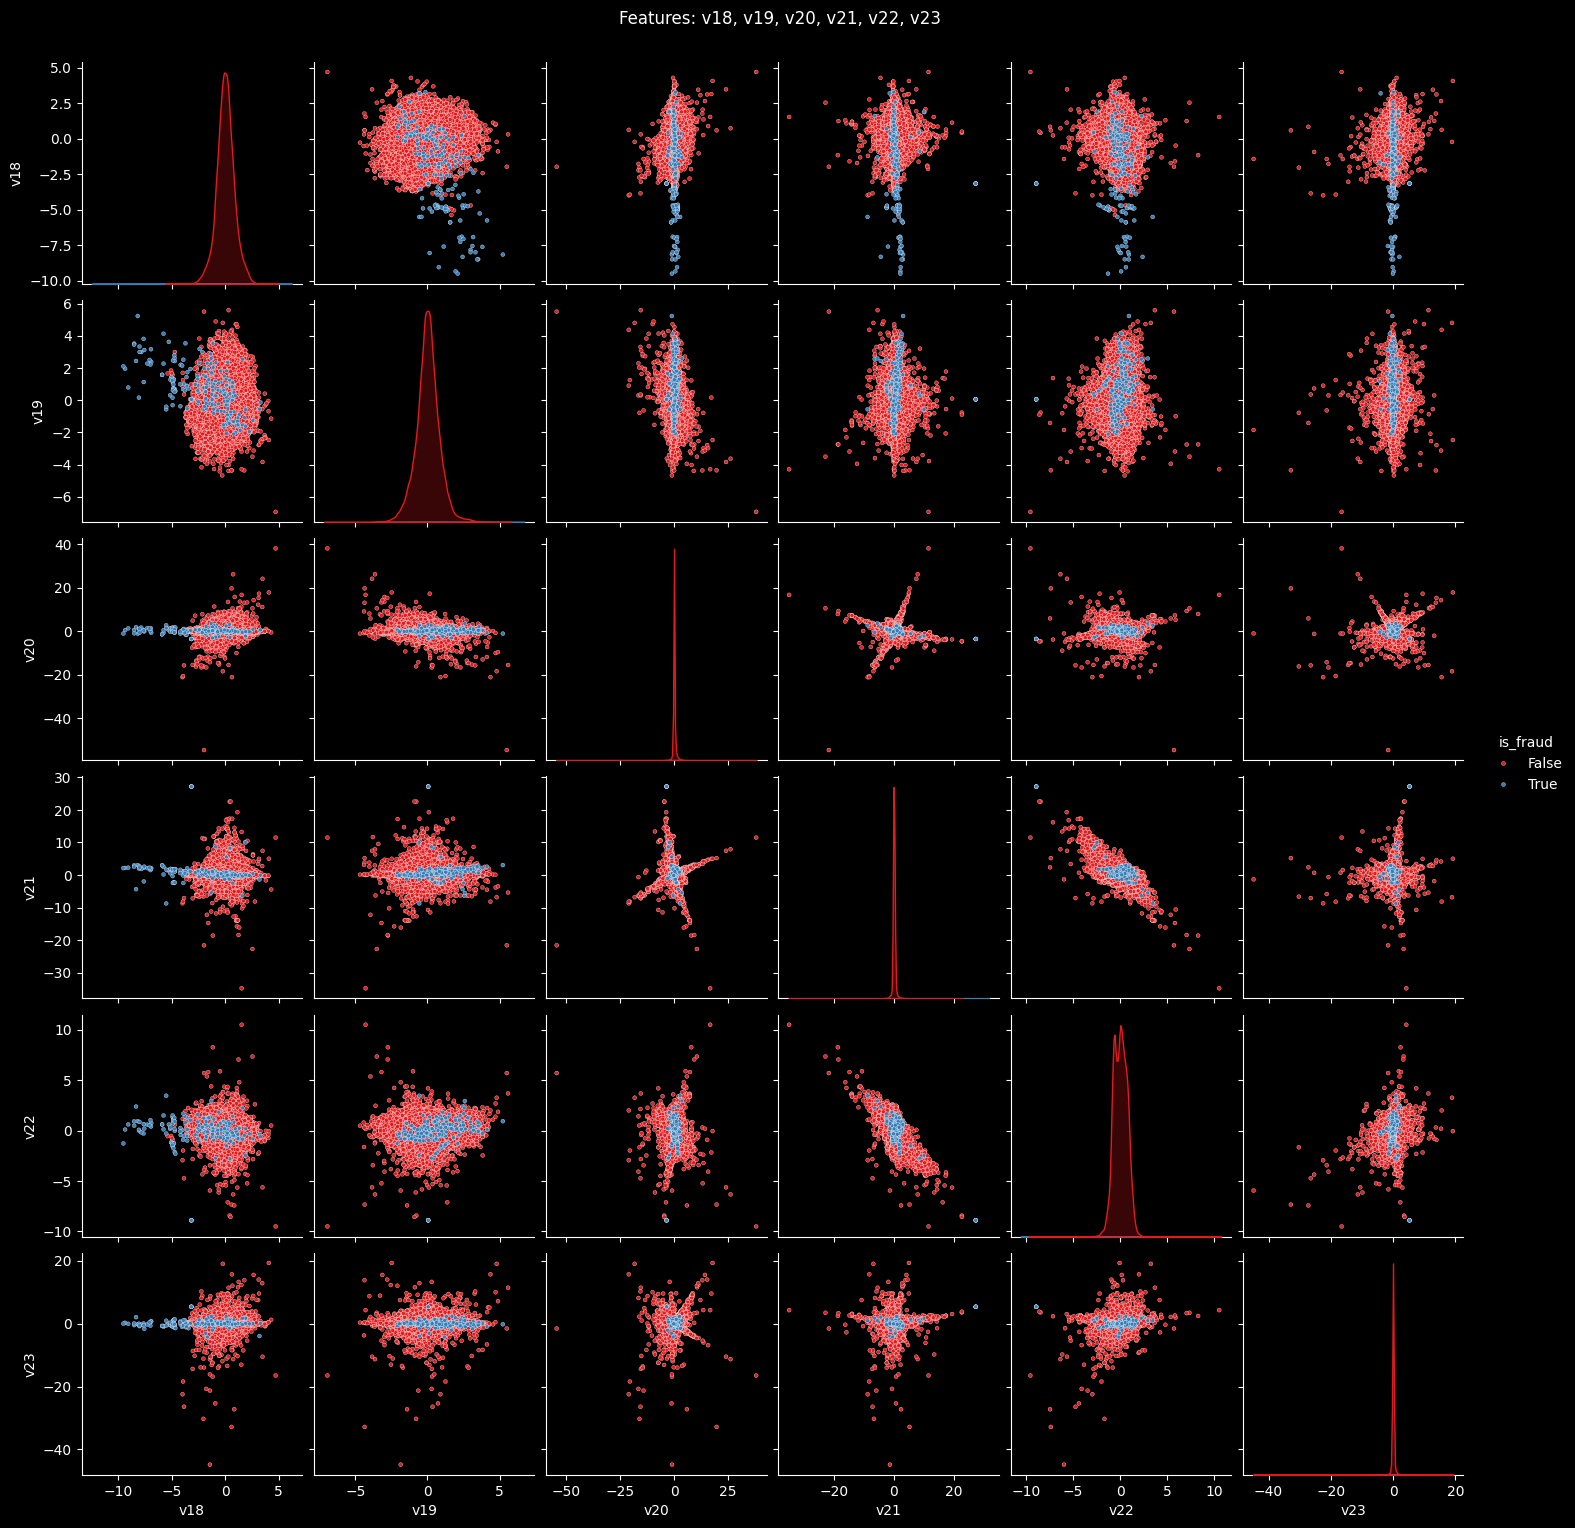

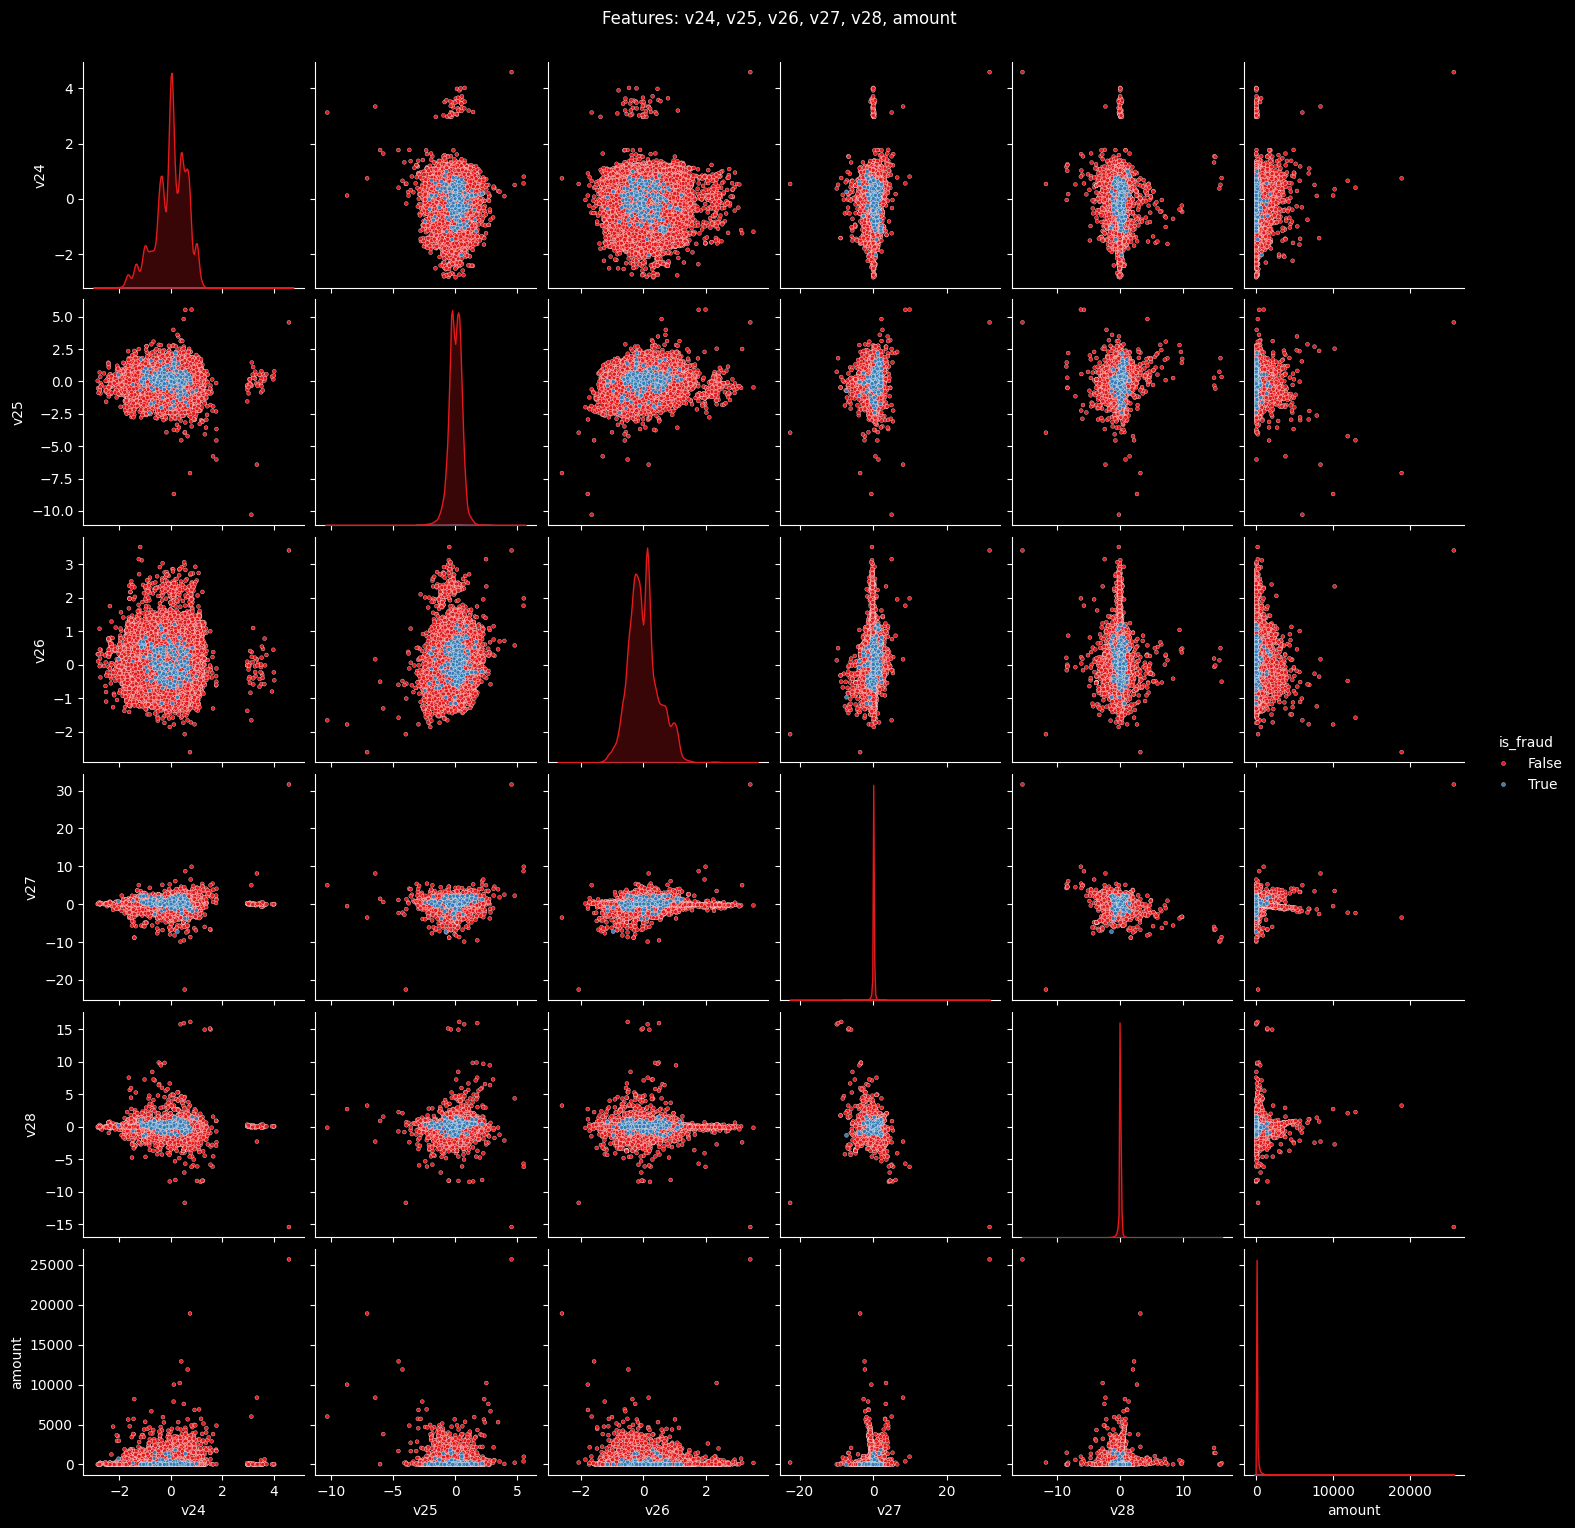

: 

In [ ]:
for group in grouped_feats:
    p = sns.pairplot(
        sampled_transactions,
        palette="Set1",
        hue=target_name,
        vars=group,
        plot_kws={"alpha": 1, "s": 8},
    )
    p.figure.suptitle(f"Features: {', '.join(group)}", y=1.02)